# Creating a new Machine Scoring Method
Hello!  This in Matt's quick tutorial on how to create and implement a new direct scoring method and then testing it on a target.

## Step 1: Load nessecary modules

In [18]:
# Add python modules
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2: Load Target and single Run Info class
Needed for loading the target image and running through models later.

In [19]:
tDir = '../targetDir'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='run_0000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'run_0000' Good!


---
## Step 4: Load score parameter file
For loading in the the new score parameter file.  You can edit this file as you see fit

In [20]:
tParams = tInfo.getImageParams()
#gm.pprint(tParams)
for key in tParams:
    print(key)

# Create a new score param in tInfo if needed
new_name = 'test_grahams_score'
new_params = {}

# Copy desired starting parameter.
new_params[new_name] = deepcopy( tParams['test_param'] )
new_params[new_name]['name'] = new_name
new_params[new_name]['cmpArg']['function_name'] = 'test_compare'
gm.pprint(new_params)

#tInfo.addImageParams(new_params, overWrite = True)



zoo_0
new_score
zoo_test
test_param
{'test_grahams_score': {'cmpArg': {'cmpMethod': 'correlation',
                                   'direct_compare_function': 'correlation',
                                   'function_name': 'test_compare',
                                   'name': 'test_score',
                                   'targetName': 'zoo_test',
                                   'type': 'direct_image_comparison'},
                        'imgArg': {'blur': {'size': 5,
                                            'type': 'gaussian_blur',
                                            'weight': 0.75},
                                   'comment': 'Smaller '
                                              'Image '
                                              'by '
                                              'Matthew.',
                                   'galaxy_centers': {'px': 50,
                                                      'py': 50,
                                

In [22]:
from main_machine_score import *
print("import")

import


In [30]:
        
def multi_image_comparison( rInfo, param, arg ):
    
    printBase = arg.printBase
    printAll = arg.printAll
    
    if printBase:  print('MS.multi_image_comparison:')
    if printAll:   gm.tabprint("score_name: %s" % param['name'] )
    
    imgName = param['imgArg']['name']
    tgtName = param['cmpArg']['targetName']
    
    if printAll:  gm.tabprint("image_name: %s" % imgName )
    if printAll:  gm.tabprint("target_name: %s" % tgtName )
    
    mImg = rInfo.getModelImage( imgName = imgName, overWrite = True )
    uImg = rInfo.getModelImage( imgName = imgName, imgType = 'init', overWrite = True )
    tImg = rInfo.tInfo.getTargetImage( tName = tgtName )
    
    # Check all images are valid
    if type( mImg ) == type( None ) \
    or type( uImg ) == type( None ) \
    or type( tImg ) == type( None ):
        print("ERROR: MS.multi_image_comparison:")
        gm.tabprint("Invalid image")
        gm.tabprint("Target: %s" % type(tImg) )
        gm.tabprint("Model : %s" % type(mImg) )
        gm.tabprint("Init  : %s" % type(uImg) )
        return
    
    # Reshape target image if needed. 
    if tImg.shape != mImg.shape:
        tImg = cv2.resize( tImg, ( mImg.shape[1], mImg.shape[0] ) )
        
    score = grahams_scoring_function( tImg, mImg, uImg )
    
    if printBase:  
        print("MS.multi_image_comparison:")
        gm.tabprint("New Score: %s - %s" % (param['name'], str( score ) ) )
    
    if score != None: 
        newScore = rInfo.addScore( name = param['name'], score=score )    
            
    else:
        print("WARNING: MS: New Score is None: %s - %s " % (rInfo.get('run_id'),param['name']))
    
    return score

# End multi_image_comparison

ms.multi_image_comparison = multi_image_comparison

rInfo.printAll = True

# Create a new score param in tInfo if needed
tParams = tInfo.getImageParams()
new_name = 'test_grahams_score_2'
new_params = {}

# Copy desired starting parameter.
new_params[new_name] = deepcopy( tParams['test_param'] )
new_params[new_name]['name'] = new_name
new_params[new_name]['imgArg']['image_size'] = { 'width':60, 'height':40 }
new_params[new_name]['imgArg']['galaxy_centers'] = { 'px':20, 'py':20, 'sx':40, 'sy':20 }
new_params[new_name]['cmpArg']['function_name'] = 'test_compare'
new_params[new_name]['cmpArg']['type'] = 'multi_image_compare'

gm.saveJson( new_params, '../param/test_graham_ms.json')

runArgs = gm.inArgClass()
runArgs.printAll = True
#runArgs.setArg( 'newSim', True )
#runArgs.setArg( 'zipSim', True )
runArgs.setArg( 'newImage', True )
runArgs.setArg( 'newScore', True )
runArgs.setArg( 'overWrite', True )
runArgs.setArg( 'scoreParams', new_params )

simr.simr_run( runArgs, rInfo,)
print("Done")

SIMR.simr_run: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f146152f0a0>
	 - Overwriting old scores
	 - Creating new scores
IC: image_creator_run
IC: rInfo.status:  True
IC: given parameters: 1
IC:  test_img
IC: Creating image:
	 - runId: run_0000
	 - score: test_grahams_score_2
IC: Image 'test_img' already made for run_0000
	 - Creating image from points
	 - Saving model image at: /home/mbo2d/587722984435351614/zoo_merger_models/run_0000/model_images/test_img_model.png
	 - Saving unperturbed at: /home/mbo2d/587722984435351614/zoo_merger_models/run_0000/misc_images/test_img_init.png
IC_LOOP:    1 /    1: COMPLETE
MS: Run:
MS: scoreName: test_grahams_score_2
MS.multi_image_comparison:
	 - score_name: test_grahams_score_2
	 - image_name: test_img
	 - target_name: zoo_test
IM: Loading: test_img:
	 - imgType: model
	 - imgLoc: /home/mbo2d/587722984435351614/zoo_merger_

___
## Step 5: Load image for comparison
Load in the target image and a model image for initial comparison

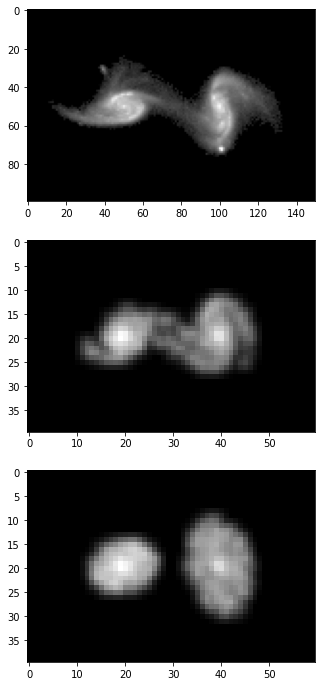

In [37]:
tImg = tInfo.getTargetImage( new_params[new_name]['cmpArg']['targetName'] )
mImg = rInfo.getModelImage( new_params[new_name]['imgArg']['name'] )
uImg = rInfo.getModelImage( new_params[new_name]['imgArg']['name'], imgType = 'init' )

plt.figure( figsize=(10,12) )
plt.subplot(311)
plt.imshow( tImg, cmap='gray')
plt.subplot(312)
plt.imshow( mImg, cmap='gray')
plt.subplot(313)
plt.imshow( uImg, cmap='gray')

___
## Step 6: Create the new comparison function!
Note: All direct image comparison take 3 arguments
- 2x images of the same size
- dict of comparison arguments

In [ ]:
# Test new scoring method on 2 images directly

def score_ssim( img1, img2, cmpArg ):
    score = -1
    score = ssim( img1, img2 )
    return score

score = score_ssim( img1, img2, None )

print(score)

___
## Step 7: Load new function into direct image module
This will allow the existing code to run the function in a standard new score operation.

In [ ]:
# Assign new function to test function in direct image compare
dc.set_test_compare(score_ssim)

# Check if all modules loaded the same function
print("NOTE! All should match")
print('nb:   ',score_ssim)
print('dc:   ',dc.test_compare)
print('ms:   ',ms.dc.test_compare)
print('simr: ',simr.ms.dc.test_compare)


___
## Step 8: Execute new score operation for a single model.
This confirms that the score function operates correcting in the new score pipeline

In [ ]:
newRunScoreArg = gm.inArgClass()
newRunScoreArg.setArg( 'rInfo', rInfo )
newRunScoreArg.setArg( 'scoreParams', new_params )
newRunScoreArg.setArg( 'printAll', True )
newRunScoreArg.setArg( 'newScore', True )
newRunScoreArg.setArg( 'overWrite', True )

simr.simr_run( rInfo = rInfo, arg = newRunScoreArg )
rInfo.printScores()

___
## Step 9: Execute new score operation for a complete target.
Execute the new function for a target and see if it works across many models

In [ ]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'scoreParams', new_params )
newTarget.setArg( 'printAll', False )
newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

simr.simr_target( arg=newTarget )

***
## Step 10: View results!
View if your new method does well or not.

In [ ]:
scores = tInfo.getScores()
sa.getNamedPlot(scores)

___
## Step 11: Add new function to direct_image_comparison.py

## Step 12: Rename parameter and save
- Create a new dict of the new score parameter
    - Parameter name
    - cmpMethod name: Match name of function in directory_image_compare
   

In [ ]:
param = deepcopy( new_params['new_score'] )
param['name'] = 'base0_ssim'
param['cmpArg']['cmpMethod'] = 'ssim'

gm.pprint(param)

___
## Step 13: Save in a score parameter file

In [ ]:
# Load existing score parameter file
pLoc = gm.validPath('../param/base0.json')
print(pLoc,'\n')
baseParamClass = im.group_score_parameter_class(pLoc = pLoc)

#gm.pprint(baseParams)

# Add new score parameter to dict
baseParamClass.group[ param['name'] ] = param
gm.pprint(baseParamClass.group)
baseParamClass.saveParam( saveLoc = '../param/base0.json' )


___
## Step 14: Have target run the score parameter file you just updated

In [ ]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'scoreParams', baseParamClass.group )
newTarget.setArg( 'printAll', False )
newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

#gm.pprint(newTarget.get('scoreParams'))

simr.simr_target( arg=newTarget )

___
## Step 15: view target results of new score function! Again!

In [ ]:
scores = tInfo.getScores()
ax = sa.getNamedPlot(scores, sName = 'base0_ssim' )